In [10]:
import pandas as pd
import numpy as np

In [19]:
# pic all file from 'tempsWavs/mp3' and convert them intp wav and put them in a new folder 'tempsWavs/wav'
import os
import pydub
from pydub import AudioSegment
from pydub.playback import play
from pydub.utils import mediainfo
import shutil

# create a new folder
if not os.path.exists('tempsWavs/wav'):
    os.makedirs('tempsWavs/wav')

# convert all mp3 files to wav
for file in os.listdir('tempsWavs/mp3'):
    if file.endswith('.mp3'):
        sound = AudioSegment.from_mp3('tempsWavs/mp3/'+file)
        sound.export('tempsWavs/wav/'+file[:-4]+'.wav', format='wav')

# create a new folder
if not os.path.exists('tempsWavs/mono'):
    os.makedirs('tempsWavs/mono')



In [56]:
import librosa

a,s=librosa.load("tempsWavs/wav/french3.wav")
b,t=librosa.load("tempsWavs/wav/german3.wav")
mfcc1= librosa.feature.mfcc(y=a,sr=s)
mfcc2= librosa.feature.mfcc(y=b,sr=t)

In [57]:
def concatfeatures(realdata, mfcc1):
    temp1=mfcc1.T[1][1:19]
    for frame in range(10,50):
        temp1=np.concatenate((temp1,mfcc1.T[frame][1:19]))
    realdata.append(temp1)

In [58]:
real=[]
concatfeatures(real,mfcc1)
concatfeatures(real,mfcc2)

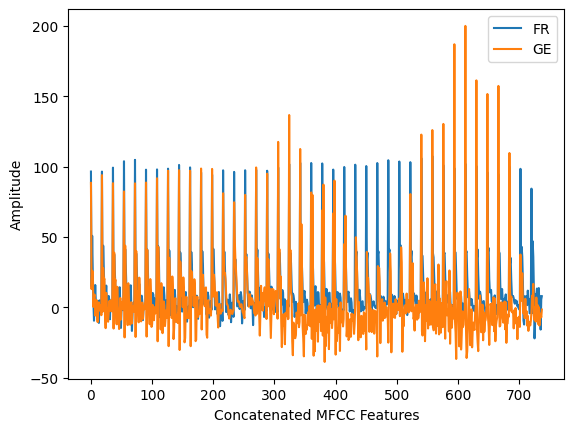

In [59]:
import matplotlib.pyplot as plt

plt.plot(real[0])
plt.plot(real[1])
plt.xlabel("Concatenated MFCC Features")
plt.ylabel("Amplitude")
plt.savefig("../analysis.png")
plt.legend(["FR","GE"])
plt.show()